In [1]:
%pylab inline
figsize(10,5)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import clstm

Network creation and initialization is very similar to C++:

 - networks are created using the `make_net(name)` factory function
 - the `net.set(key,value)` method is used to set up parameters
 - the `.setLearningRate(lr,mom)` method is used to set learning rate and momentum
 - `.initialize()` is called to create the network

As in C++, the combination of `make_net` and `set` does not allow arbitrary network architectures to be constructed. For anything complicated, you 

In [3]:
net = clstm.make_net("LSTM1")
net.set("ninput",1)
net.set("nhidden",4)
net.set("noutput",2)
net.setLearningRate(1e-5,0.9)
net.initialize()
print clstm.network_info(net)

.lstm1: 0.000010 0.900000 1 2
.lstm1.lstm: 0.000100 0.900000 1 4
.lstm1.softmax: 0.000100 0.900000 4 2



You can navigate the network structure as you would in C++. You can use similar methods to create more complex network architectures than possible with `make_net`.

In [4]:
print net.sub.size()
print net.sub[0]
print net.sub[0].name

2
<clstm.INetwork; proxy of <Swig Object of type 'std::shared_ptr< INetwork > *' at 0x7fc247e5fa50> >
lstm


This cell generally illustrates how to invoke the CLSTM library from Python:

 - `net.inputs`, `net.outputs`, `net.d_inputs`, and `net.d_outputs` are `Sequence` types
 - `Sequence` objects can be converted to rank 3 arrays using the .array() method
 - The values in a `Sequence` can be set with the `.aset(array)` method

In [5]:
N = 20
xs = array(randn(N,1,1)<0.2, 'f')
net.inputs.aset(xs)
net.forward()

Here is a training loop that generates a delayed-by-one from a random input sequence and trains the network to learn this task.

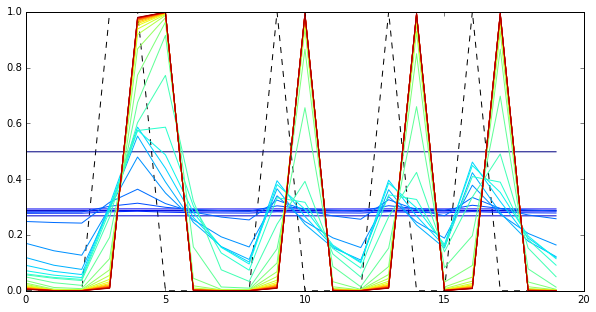

In [6]:
N = 20
test = array(rand(N)<0.3, 'f')
plot(test, '--', c="black")
ntrain = 30000
for i in range(ntrain):
    xs = array(rand(N)<0.3, 'f')
    ys = roll(xs, 1)
    ys[0] = 0
    ys = array([1-ys, ys],'f').T.copy()
    net.inputs.aset(xs.reshape(N,1,1))
    net.forward()
    net.d_outputs.aset(ys.reshape(N,2,1)-net.outputs.array())
    net.backward()
    net.update()
    if i%1000==0:
        net.inputs.aset(test.reshape(N,1,1))
        net.forward()
        plot(net.outputs.array()[:,1,0],c=cm.jet(i*1.0/ntrain))